### This project is an exploration of Sales market data using time series analysis techniques `(ARIMA, SARMA)`.

# The general process for ARIMA models is the following:

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from

In [2]:
df=pd.read_csv("/content/drive/MyDrive/perrin-freres-monthly-champagne-.csv")

In [3]:
df.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.isna().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [6]:
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)


In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df.columns=["Month","sales"]

In [9]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df["Month"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [11]:
df.set_index("Month",inplace=True)


In [12]:
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualize the Data

<Axes: xlabel='Month'>

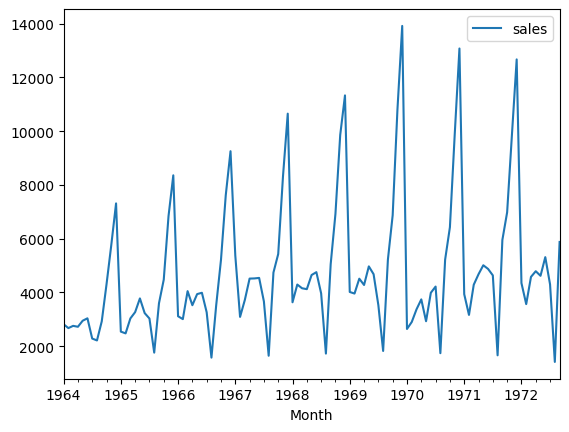

In [14]:
df.plot()

# Testing For Stationarity

* # adfuller

In [15]:
from statsmodels.tsa.stattools import adfuller


In [16]:
def adfuller_test(sales):
    result = adfuller(sales)
    critical_value = result[4]
    dfoutput=pd.Series(data=result[0:4],index=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    for label,value in critical_value.items():
        print (label+":"+str(value))

In [17]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result = adfuller(sales)
    critical_value = result[4]
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for Value,label in zip(result,labels):
        print(label+' : '+str(Value) )
    if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    for label,value in critical_value.items():
        print (label+":"+str(value))


In [18]:
adfuller_test(df["sales"])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
1%:-3.502704609582561
5%:-2.8931578098779522
10%:-2.583636712914788


## Test using rolling statistics

In [19]:
roll_mean=df.rolling(window=12).mean() #window the rolling mean will be calculated using the current value and the 11 preceding values
roll_std=df.rolling(window=12).std()

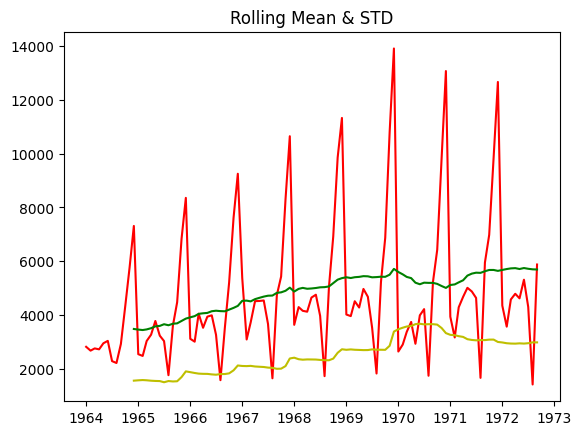

In [20]:
orgin=plt.plot(df,"r", label = "Original")
mean=plt.plot(roll_mean,"g", label = "Original")
std=plt.plot(roll_std,"y", label = "Original")
plt.title("Rolling Mean & STD")
plt.show()

### indicating it is non-stationary because mean and std not conistant over time and there trend

### to solve the previouse manually use shift methode

# Differencing
### Differencing can help stabilize the mean of the series by removing trends or seasonality, making the series stationary.
  #### This operation can be useful for several reasons:
  * Stationarity
  *Removing Trends
  *Removing Seasonality
  *Making the Series More Predictable
  *Residual Analysis

In [21]:
df["sales"]

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: sales, Length: 105, dtype: float64

In [22]:
df['Sales First Difference']=df["sales"]-df["sales"].shift(1)
df['Sales First Difference']

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales First Difference, Length: 105, dtype: float64

In [23]:
df["sales"].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [24]:
df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)


In [25]:
df.head(14)

,sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [26]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
1%:-3.503514579651927
5%:-2.893507960466837
10%:-2.583823615311909


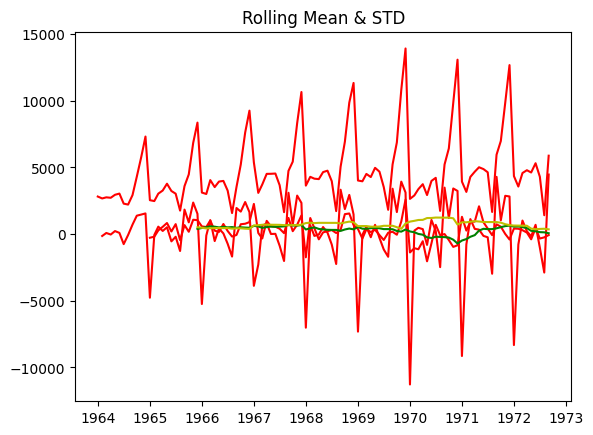

In [27]:
roll_mean=df['Seasonal First Difference'].dropna().rolling(window=12).mean() #window the rolling mean will be calculated using the current value and the 11 preceding values
roll_std=df['Seasonal First Difference'].dropna().rolling(window=12).std()
orgin=plt.plot(df,"r", label = "Original")
mean=plt.plot(roll_mean,"g", label = "Original")
std=plt.plot(roll_std,"y", label = "Original")
plt.title("Rolling Mean & STD")
plt.show()

<Axes: xlabel='Month'>

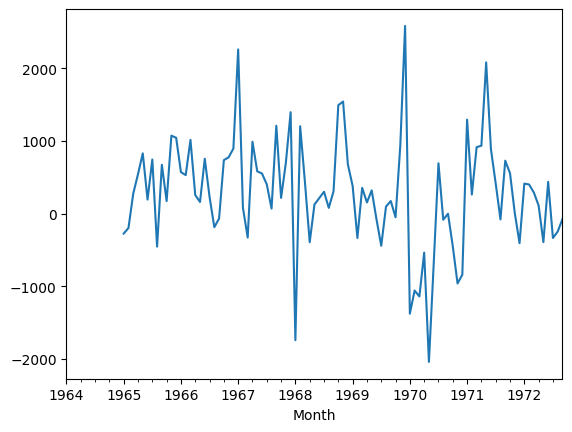

In [28]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model

* Identification of an **AR** model is often best done with the **PACF**.

* For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an **MA** model is in the **ACF**. The ACF will have non-zero autocorrelations only at lags involved in the model.
p AR model lags d differencing q MA lags

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

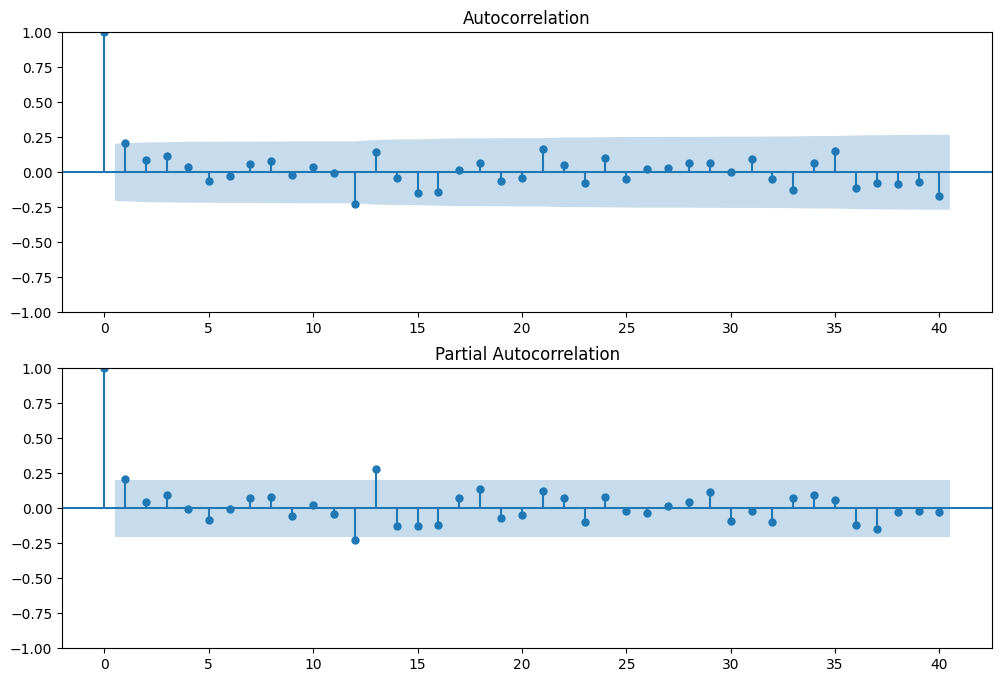

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order (p, d, q) for the ARIMA model
order = (1, 1, 1)

# Fit the ARIMA model
model = ARIMA(df['sales'], order=order)
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 22 Mar 2024   AIC                           1911.627
Time:                        11:12:46   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.0

In [35]:
df.shape

(105, 4)

<Axes: xlabel='Month'>

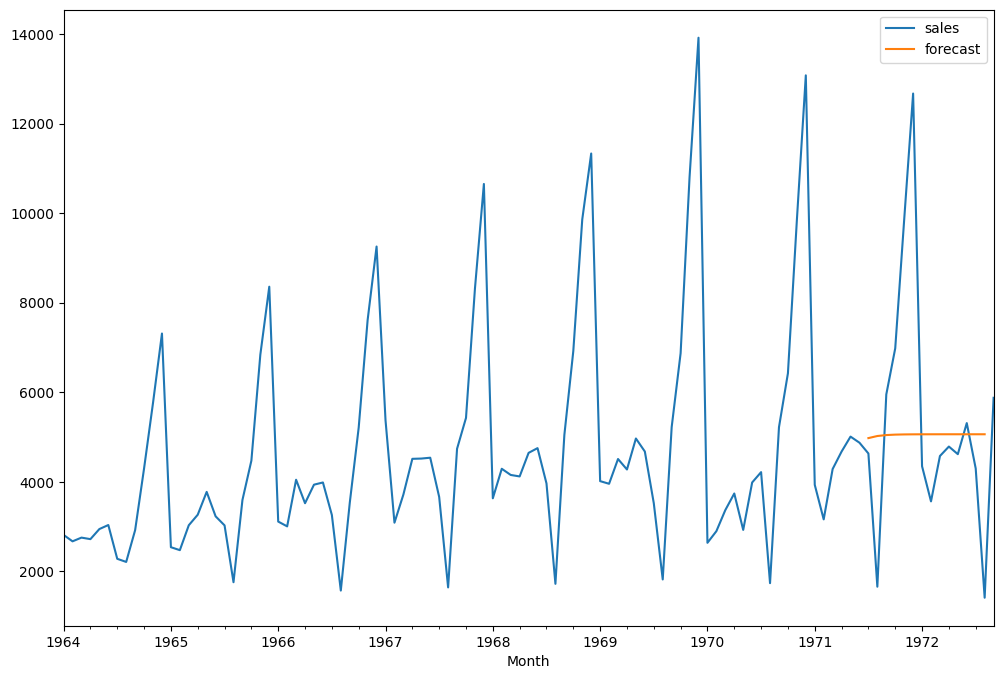

In [32]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [33]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #s = 12: The seasonal period is 12, indicating that the data exhibits seasonality with a yearly cycle
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

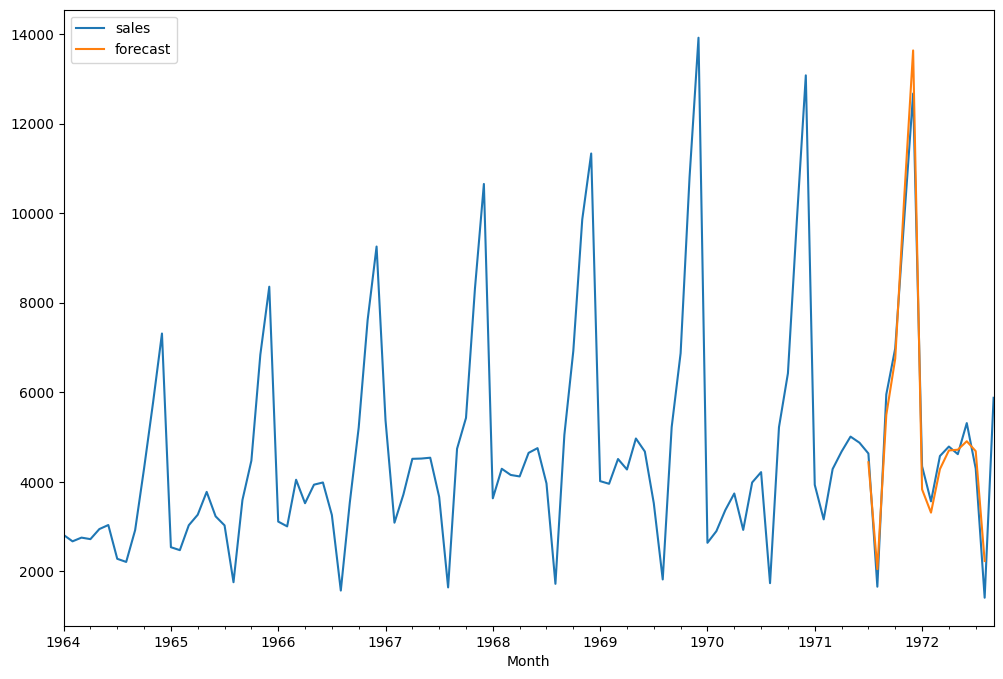

In [34]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [40]:
df.tail()

,sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,4717.510672
1972-06-01,5312.0,694.0,438.0,4906.403885
1972-07-01,4298.0,-1014.0,-335.0,4685.436279
1972-08-01,1413.0,-2885.0,-246.0,2232.408415
1972-09-01,5877.0,4464.0,-74.0,NaN


In [41]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [48]:
last_date = df.index[-1]
future_dates = []

for x in range(0, 24):
    future_date = last_date + DateOffset(months=x)

    # Handle rollover to the next year
    if future_date.month > 12:
        future_date = future_date.replace(year=future_date.year + 1, month=future_date.month % 12)

    future_dates.append(future_date)


In [50]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [51]:
future_datest_df.head()

,sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN


In [55]:
future_df=pd.concat([df,future_datest_df])

In [61]:
future_df.shape

(128, 4)

<Axes: >

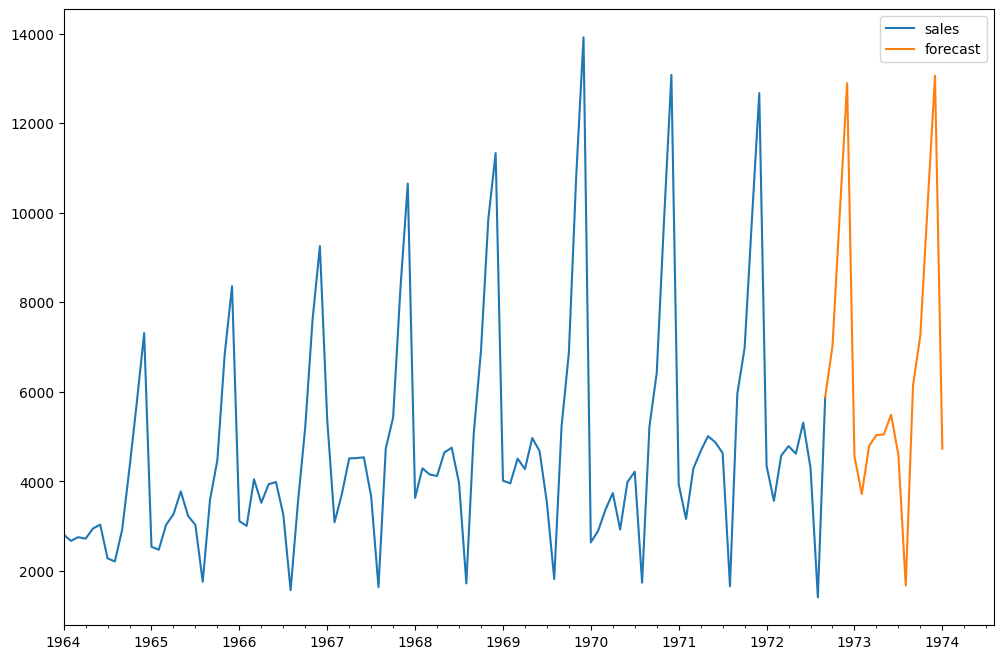

In [63]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['sales', 'forecast']].plot(figsize=(12, 8))

# QA

Specifically, window=12 indicates that the rolling window size is 12 data points. This means that for each point in the data, the rolling mean will be calculated using the current value and the 11 preceding values (a total of 12 values) if available.

The rolling window size is a crucial parameter that determines the level of smoothing or aggregation applied to the data. A larger window size results in smoother rolling statistics, while a smaller window size provides more granular insights but may be subject to more noise.
In this case, with window=12, the rolling mean is computed over a yearly period

�
p (Autoregressive Order):

�
p represents the order of the autoregressive (AR) component of the model.
The AR component captures the relationship between the current observation and a certain number of lagged observations.
A higher
�
p value indicates that more lagged observations are included in the model.
�
d (Differencing Order):

�
d represents the degree of differencing required to make the time series stationary.
Differencing involves computing the differences between consecutive observations to remove trends or seasonality from the data.
A
�
d value of 0 indicates no differencing, while higher values represent the number of times differencing is applied to achieve stationarity.
�
q (Moving Average Order):

�
q represents the order of the moving average (MA) component of the model.
The MA component captures the relationship between the current observation and a certain number of lagged forecast errors.
A higher
�
q value indicates that more lagged forecast errors are included in the model.